In [48]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import scipy as sp
import matplotlib.pyplot as plt
import math

pmf 확률질량함수(probability mass function) 

pdf 확률밀도함수(probability debsity function)

cdf 누적분포함수(cumulative distribution function)

ppf 누적분포함수의 역함수(inverse cumulative distribution function)

sf 생존함수(survival function) = 1 - 누적분포함수

isf 생존함수의 역함수(inverse survival function)

rvs 랜덤 표본 생성(random variable sampling)

<function matplotlib.pyplot.show(*args, **kw)>

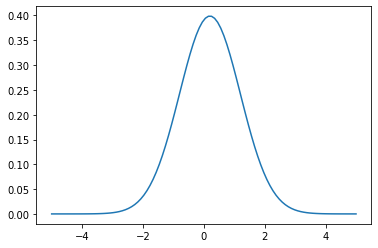

In [49]:
rv = sp.stats.norm(0.2) #평균 0,표준편차 2
print(rv)
x = np.linspace(-5,5,100) #동일 간격으로 -5부터 5까지 100개 생성
y1 = rv.pdf(x) # pdf: 확률밀도함수
plt.plot(x,y1)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

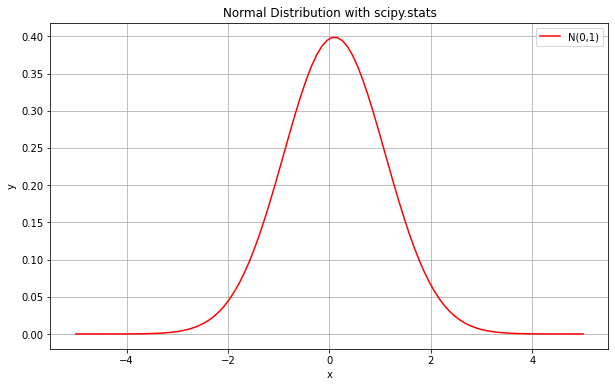

In [50]:
rv = sp.stats.norm(0.1) #평균 0,표준편차 1
y1 = rv.pdf(x)
plt.figure(figsize=(10,6)) #플롯 사이즈 지정
plt.plot(x,y1, color="red") #선을 빨강색으로 지정하여 plot작성
plt.xlabel("x") #x축 레이블 지정
plt.ylabel("y") #y축 레이블 지정
plt.grid() #플롯에 격자 보이기
plt.title("Normal Distribution with scipy.stats") #타이틀 표시
plt.legend(["N(0,1)"]) #범례 표시
plt.show

예제 8-31 표준정규분포(2)

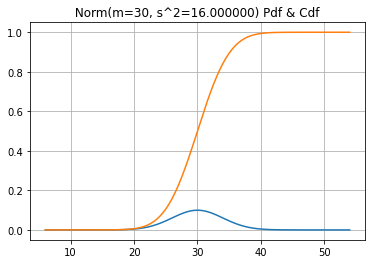

Prob (47 < x < 51) = 1.0612476169735707e-05


In [51]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats

def show_pdfcdf(rv,m,s):
  mm = m
  ss = 6 * s
  xx = np.linspace(mm - ss, mm + ss, 200)
  pdf =rv.pdf(xx)
  cdf =rv.cdf(xx)

  plt.grid(True)
  plt.plot(xx, pdf)
  plt.plot(xx, cdf)
  plt.title(f" Norm(m={m}, s^2={s*s:3f}) Pdf & Cdf ")
  plt.savefig("dist.png")
  plt.show()


m, s = 30, np.sqrt(16)
rv = sp.stats.norm(m,s)

show_pdfcdf(rv, m, s)

x1, x2 = 47, 51
print(f"Prob ({x1} < x < {x2}) =", rv.cdf(x2) - rv.cdf(x1) )

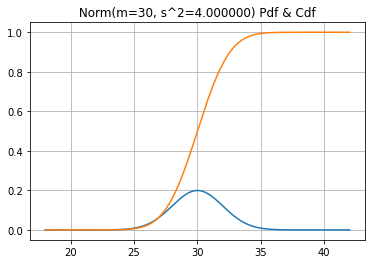

Prob (25 =) 0.006209665325776132
Prob (35 =) 0.9937903346742238
Prob (35 - 25) 0.9875806693484477


In [52]:
m, s = 30, np.sqrt(4)
rv = sp.stats.norm(m,s)

show_pdfcdf(rv, m, s)

#25~30평균을 구해보자
x1 = 25
x2 = 35
print(f"Prob ({x1} =)",rv.cdf(x1) )
print(f"Prob ({x2} =)",rv.cdf(x2) )
print(f"Prob ({x2} - {x1})",rv.cdf(x2) - rv.cdf(x1) )

8-32 이항분포와 정규분포의 관계 //주사위

30.0 5.0


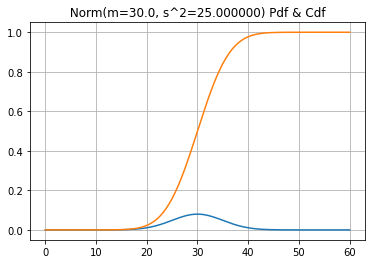

Prob (35 =) 0.8413447460685429
Prob (50 =) 0.9999683287581669
Prob (50 - 35) 0.15862358268962395


In [53]:
m, s = 180*1/6, np.sqrt(180*1/6*5/6)
rv = sp.stats.norm(m,s)
print(m,s)
show_pdfcdf(rv, m, s)

#35~50평균을 구해보자
x1 = 35
x2 = 50
print(f"Prob ({x1} =)",rv.cdf(x1) )
print(f"Prob ({x2} =)",rv.cdf(x2) )
print(f"Prob ({x2} - {x1})",rv.cdf(x2) - rv.cdf(x1) )

8-30표준정규분포(1)(a)

2 3.0


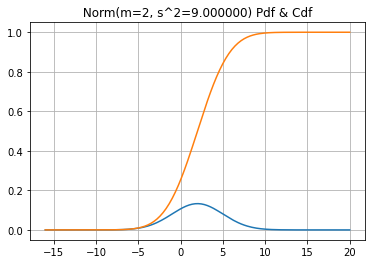

Prob (2 =) 0.5
Prob (8 =) 0.9772498680518208
Prob (8 - 2) 0.4772498680518208


In [54]:
m, s = 2, np.sqrt(9)
rv = sp.stats.norm(m,s)
print(m,s)
show_pdfcdf(rv, m, s)

#35~50평균을 구해보자
x1 = 2
x2 = 8
print(f"Prob ({x1} =)",rv.cdf(x1) )
print(f"Prob ({x2} =)",rv.cdf(x2) )
print(f"Prob ({x2} - {x1})",rv.cdf(x2) - rv.cdf(x1) )

8-30표준정규분포(1)(b)

2 3.0


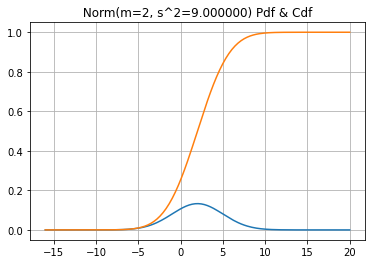

Prob (-1 =) 0.15865525393145707
Prob (x <- -1) 0.15865525393145707


In [55]:
m, s = 2, np.sqrt(9)
rv = sp.stats.norm(m,s)
print(m,s)
show_pdfcdf(rv, m, s)

#35~50평균을 구해보자
x2 = -1
print(f"Prob ({x2} =)", rv.cdf(x2) )
print(f"Prob (x <- {x2})", rv.cdf(x2))

In [56]:
#신뢰도 구간
sample1= [5, 10, 17, 29, 14, 25 ,16, 13, 9, 17]
sample2= [21, 22, 27, 19, 23, 24, 20, 26, 25, 23]

In [57]:
import numpy as np
import scipy.stats as st

df = len(sample1) - 1 # 자유도: 샘플 개수 -1
mu = np.mean(sample1) #표본 평균
s = np.std(sample1) #표본 표준편차
#표본분산
ss = np.std(sample1) * (df+1)/df #표본분산
se = st.sem(sample1) #표준 오차 - 표본평균의 표준 편차를 표준 오차
sss = ss/np.sqrt(df)

print("표본평균 = ",mu)
print("표본표준편차 = ",s)
print("표준오차 = ",se)
print("표준오차2 = ",sss)

#95% 신뢰구간
st.t.interval(0.95, df, mu, se)
#99% 신뢰구간
st.t.interval(0.99, df, mu, se)

표본평균 =  15.5
표본표준편차 =  6.844705983459042
표준오차 =  2.2815686611530137
표준오차2 =  2.5350762901700157


(8.085277068873378, 22.914722931126622)

In [58]:
from scipy import stats
import numpy as np
x=[10.1,10,9.8,10.5,9.7,10.1,0.0,10.2,10.3,9.9]
df = len(x)-1
print(len(x))
x1=np.array(x)
mean=x1.mean()
std=x1.std()
print("평균 = ", mean)
print("표준편차 =", std)

10
평균 =  9.06
표준편차 = 3.02826683104379


8-34 표본평균의 성질

70 0.7000000000000001


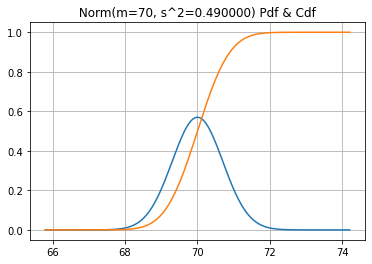

Prob (70.7 =) 0.8413447460685439
Prob (-1- 70.7) 0.15865525393145608
interval 68.628 - 71.372


In [59]:
m, s = 70, 4.9/np.sqrt(49)
rv = sp.stats.norm(m,s)
print(m,s)
show_pdfcdf(rv, m, s)

x1 = 70.7

print(f"Prob ({x1} =)",rv.cdf(x1) )
print(f"Prob ({x2}- {x1})", 1- rv.cdf(x1))

low_interval = m - 1.96 * s
upper_interval = m + 1.96 * s
print(f"interval {low_interval} - {upper_interval}")